In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#pip install jupyter ipython loguru

In [3]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from ARISA_DSML.preproc import get_raw_data
from ARISA_DSML.config import RAW_DATA_DIR, CSV_NAME, target

2025-05-08 22:17:53.605 | INFO     | ARISA_DSML.config:<module>:12 - PROJ_ROOT path is: C:\Users\Kinga\Documents\ARISA\MLOps-Final


In [4]:
import os
from pathlib import Path
container_check = os.getenv("iscontainer")
if container_check=="y":
    config_dir = Path("/home/vscode/.config/kaggle")
    config_dir.mkdir(parents=True, exist_ok=True)

    with open(config_dir / "kaggle.json", "w") as dst:
        with open("../kaggle.json", "r") as src:
            dst.write(src.read())

In [5]:
path_csv = get_raw_data()
# !dir "{RAW_DATA_DIR}"

2025-05-08 22:17:53.928 | INFO     | ARISA_DSML.preproc:get_raw_data:21 - Downloading dataset shahnawaj9/diabetes-database


Dataset URL: https://www.kaggle.com/datasets/shahnawaj9/diabetes-database


2025-05-08 22:17:54.542 | INFO     | ARISA_DSML.preproc:get_raw_data:24 - Download complete.


In [6]:
from ARISA_DSML.preproc import preprocess_df

train_path, test_path = preprocess_df(RAW_DATA_DIR / CSV_NAME)

2025-05-08 22:17:54.683 | INFO     | ARISA_DSML.preproc:preprocess_df:59 - Train saved as train.csv, Test saved as test.csv


In [7]:
import pandas as pd
df_train = pd.read_csv(train_path)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               614 non-null    int64  
 1   glucose                   614 non-null    int64  
 2   bloodpressure             614 non-null    int64  
 3   skinthickness             614 non-null    int64  
 4   insulin                   614 non-null    int64  
 5   bmi                       614 non-null    float64
 6   diabetespedigreefunction  614 non-null    float64
 7   age                       614 non-null    int64  
 8   outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [8]:
y_train = df_train.pop(target)
X_train = df_train

In [9]:
from ARISA_DSML.train import run_hyperopt

best_params_path = run_hyperopt(X_train, y_train)

C:\Users\Kinga\AppData\Roaming\Python\Python311\site-packages\mlflow\protos\service_pb2.py:11: UserWarning: google.protobuf.service module is deprecated. RPC implementations should provide code generator plugins which generate code specific to the RPC implementation. service.py will be removed in Jan 2025
  from google.protobuf import service as _service
2025-05-08 22:17:55.949 | INFO     | ARISA_DSML.train:run_hyperopt:71 - Best Parameters: {'depth': 4, 'learning_rate': 0.0517580228923669, 'iterations': 184, 'l2_leaf_reg': 0.07973165549227099, 'bagging_temperature': 0.15292750595871435, 'random_strength': 0.0002482703621761438}


In [10]:
!pip install packaging

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import joblib
from ARISA_DSML.train import train_cv
params = joblib.load(best_params_path)
display(params)
n_folds = 5
cv_output_path = train_cv(X_train, y_train, params, n=n_folds)

{'depth': 4,
 'learning_rate': 0.0517580228923669,
 'iterations': 184,
 'l2_leaf_reg': 0.07973165549227099,
 'bagging_temperature': 0.15292750595871435,
 'random_strength': 0.0002482703621761438}

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.6204620	test: 0.7073171	best: 0.7073171 (0)	total: 161ms	remaining: 29.5s
1:	learn: 0.6410256	test: 0.7160494	best: 0.7160494 (1)	total: 166ms	remaining: 15.1s
2:	learn: 0.6308725	test: 0.6842105	best: 0.7160494 (1)	total: 170ms	remaining: 10.3s
3:	learn: 0.6462585	test: 0.6666667	best: 0.7160494 (1)	total: 174ms	remaining: 7.84s
4:	learn: 0.6644951	test: 0.7012987	best: 0.7160494 (1)	total: 177ms	remaining: 6.33s
5:	learn: 0.6644295	test: 0.6666667	best: 0.7160494 (1)	total: 179ms	remaining: 5.31s
6:	learn: 0.6576271	test: 0.6666667	best: 0.7160494 (1)	total: 181ms	remaining: 4.57s
7:	learn: 0.6644068	test: 0.6575342	best: 0.7160494 (1)	total: 183ms	remaining: 4.02s
8:	learn: 0.6712329	test: 0.6575342	best: 0.7160494 (1)	total: 184ms	remaining: 3.59s
9:	learn: 0.6755853	test: 0.6756757	best: 0.7160494 (1)	total: 186ms	remaining: 3.24s
10:	learn: 0.6824324	test: 0.6575342	best: 0.7160494 (1)	total: 188ms	remaining: 2.95s
11:	learn: 0.6912752	test: 0.6

In [12]:
from ARISA_DSML.train import plot_error_scatter
cv_results = pd.read_csv(cv_output_path)
plot_error_scatter(
    df_plot=cv_results,
    name="Mean F1 Score",
    title="Cross-Validation (N=5) Mean F1 score with Error Bands",
    xtitle="Training Steps",
    ytitle="Performance Score",
    yaxis_range=[0.5, 1],
)

In [13]:
plot_error_scatter(
    df_plot=cv_results,
    x="iterations",
    y="test-Logloss-mean",
    err="test-Logloss-std",
    name="Mean logloss",
    title="Cross-Validation (N=5) Mean Logloss with Error Bands",
    xtitle="Training Steps",
    ytitle="Logloss",
)

In [14]:
from ARISA_DSML.train import train
model_path, model_params_path = train(X_train, y_train, params)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6494845	total: 1.06ms	remaining: 194ms
50:	learn: 0.7124011	total: 43.7ms	remaining: 114ms
100:	learn: 0.8112245	total: 85ms	remaining: 69.9ms
150:	learn: 0.8506329	total: 129ms	remaining: 28.1ms
183:	learn: 0.8822055	total: 158ms	remaining: 0us


C:\Users\Kinga\AppData\Roaming\Python\Python311\site-packages\mlflow\types\utils.py:394: UserWarning:

Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.

Registered model 'diabetes-bclass' already exists. Creating a new version of this model...
Created version '2' of model 'diabetes-bclass'.
c:\Users\Kinga\Documents\ARISA\MLOPs-Final\ARISA_DSML\train.py:178: FutureWarning:

``mlflow.tracking.

In [15]:
df_test = pd.read_csv(test_path)

df_test.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0


In [16]:
y_test = df_test.pop(target)
X_test = df_test

In [17]:
df_test.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,6,98,58,33,190,34.0,0.430,43
1,2,112,75,32,0,35.7,0.148,21
2,2,108,64,0,0,30.8,0.158,21
3,8,107,80,0,0,24.6,0.856,34
4,7,136,90,0,0,29.9,0.210,50


In [18]:
df_train.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,2,84,0,0,0,0.0,0.304,21
1,9,112,82,24,0,28.2,1.282,50
2,1,139,46,19,83,28.7,0.654,22
3,0,161,50,0,0,21.9,0.254,65
4,6,134,80,37,370,46.2,0.238,46


{'depth': 4,
 'learning_rate': 0.0517580228923669,
 'iterations': 184,
 'l2_leaf_reg': 0.07973165549227099,
 'bagging_temperature': 0.15292750595871435,
 'random_strength': 0.0002482703621761438,
 'eval_metric': 'F1',
 'loss_function': 'Logloss',
 'feature_columns': ['pregnancies',
  'glucose',
  'bloodpressure',
  'skinthickness',
  'insulin',
  'bmi',
  'diabetespedigreefunction',
  'age'],
 'ignored_features': [0]}

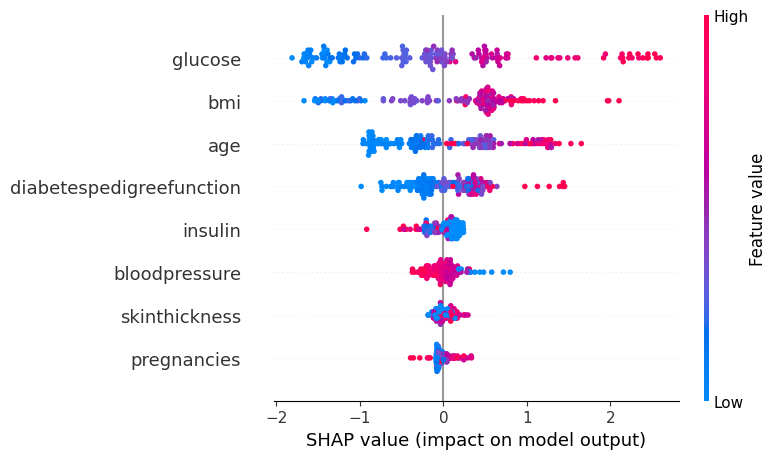

In [19]:
from ARISA_DSML.predict import predict
from catboost import CatBoostClassifier

params = joblib.load(model_params_path)
display(params)
from_file = CatBoostClassifier()
model = from_file.load_model(str(model_path))
preds_path = predict(model, df_test, params)